<div style="background-color:#f5f5f5; padding: 20px; border-radius: 15px; border: 2px solid #ffd700; box-shadow: 5px 5px 15px #888888;">
    <h1 align="center" style="color:#8B0000; font-family: 'Georgia', serif; font-size: 36px;">
        🍄 Binary Prediction of Poisonous Mushrooms 🍄
    </h1>
    <h2 align="center" style="color:#4682B4; font-family: 'Courier New', monospace; font-size: 28px;">
        Playground Series - Season 4, Episode 8
    </h2>
    <p style="color:#333333; font-family: 'Arial', sans-serif; font-size: 18px; text-align: justify;">
        <strong>Welcome to the 2024 Kaggle Playground Series!</strong> This series is designed to continue the tradition of previous playgrounds, offering engaging and approachable datasets for our community to hone their machine learning skills. We aim to host a new competition each month, encouraging both beginners and experts to participate.
    </p>
    <p style="color:#333333; font-family: 'Arial', sans-serif; font-size: 18px; text-align: justify;">
        <strong>Your Goal:</strong> The challenge for this competition is to predict whether a mushroom is edible or poisonous based on its physical characteristics. This binary classification task will test your ability to analyze, preprocess, and model data effectively.
    </p>
</div>



<div style="background-color:#f0f8ff; border-left: 6px solid #4caf50; padding: 10px; border-radius: 5px;">

<h1 align="center" style="color:darkgoldenrod; font-family: 'Arial', sans-serif; letter-spacing: 1px;">
🚀 IMPORT LIBRARIES 🚀
</h1>

</div>


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns


2024-08-13 16:00:10.678909: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-13 16:00:10.679078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-13 16:00:10.817866: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


<div style="background-color: #e0f7fa; border: 2px solid #00838f; padding: 20px; border-radius: 15px; text-align: center;">

<h1 style="color: #004d40; font-family: 'Trebuchet MS', sans-serif; font-weight: bold; text-transform: uppercase; letter-spacing: 3px;">
🚀 LOAD THE DATA 🚀
</h1>

</div>


In [2]:
# Replace 'path_to_dataset' with the actual path to the dataset files
train_data = pd.read_csv('/kaggle/input/playground-series-s4e8/train.csv')
test_data = pd.read_csv('/kaggle/input/playground-series-s4e8/test.csv')
submission_data = pd.read_csv('/kaggle/input/playground-series-s4e8/sample_submission.csv')

In [3]:
from IPython.display import display, HTML

# Display DataFrame info as a table
info_html = train_data.info(buf=None)  # Capture the info output
info_html = str(info_html).replace('\n', '<br>')  # Convert newlines to HTML line breaks
display(HTML(f"<pre>{info_html}</pre>"))  # Display the info in a preformatted block

# Display the head of the DataFrame as a table
display(HTML(train_data.head().to_html(classes='table table-bordered table-hover table-condensed')))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116945 entries, 0 to 3116944
Data columns (total 22 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   class                 object 
 2   cap-diameter          float64
 3   cap-shape             object 
 4   cap-surface           object 
 5   cap-color             object 
 6   does-bruise-or-bleed  object 
 7   gill-attachment       object 
 8   gill-spacing          object 
 9   gill-color            object 
 10  stem-height           float64
 11  stem-width            float64
 12  stem-root             object 
 13  stem-surface          object 
 14  stem-color            object 
 15  veil-type             object 
 16  veil-color            object 
 17  has-ring              object 
 18  ring-type             object 
 19  spore-print-color     object 
 20  habitat               object 
 21  season                object 
dtypes: float64(3), int64(1), object(18)
memory

,id,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,0,e,8.80,f,s,u,f,a,c,w,4.51,15.39,NaN,NaN,w,NaN,NaN,f,f,NaN,d,a
1,1,p,4.51,x,h,o,f,a,c,n,4.79,6.48,NaN,y,o,NaN,NaN,t,z,NaN,d,w
2,2,e,6.94,f,s,b,f,x,c,w,6.85,9.93,NaN,s,n,NaN,NaN,f,f,NaN,l,w
3,3,e,3.88,f,y,g,f,s,NaN,g,4.16,6.53,NaN,NaN,w,NaN,NaN,f,f,NaN,d,u
4,4,e,5.85,x,l,w,f,d,NaN,w,3.37,8.36,NaN,NaN,w,NaN,NaN,f,f,NaN,g,a


In [4]:
# Check for missing values in the train and test datasets
print("Missing values in Train Dataset:")
print(train_data.isnull().sum())

print("\nMissing values in Test Dataset:")
print(test_data.isnull().sum())

# Drop duplicates in train and test datasets
train_df = train_data.drop_duplicates()
test_df = test_data.drop_duplicates()


Missing values in Train Dataset:
id                            0
class                         0
cap-diameter                  4
cap-shape                    40
cap-surface              671023
cap-color                    12
does-bruise-or-bleed          8
gill-attachment          523936
gill-spacing            1258435
gill-color                   57
stem-height                   0
stem-width                    0
stem-root               2757023
stem-surface            1980861
stem-color                   38
veil-type               2957493
veil-color              2740947
has-ring                     24
ring-type                128880
spore-print-color       2849682
habitat                      45
season                        0
dtype: int64

Missing values in Test Dataset:
id                            0
cap-diameter                  7
cap-shape                    31
cap-surface              446904
cap-color                    13
does-bruise-or-bleed         10
gill-attachment          

In this dataset, there are missing values in both the training and test datasets. To address these missing values, the following strategies were employed:

To address missing values:

1. Numerical Columns: Used the median value for imputation (cap-diameter, stem-height, stem-width).
2. Categorical Columns: Filled missing values with the most frequent value for columns like cap-shape, cap-surface, cap-color, etc.

<div style="background-color:#f0f8ff; border-left: 6px solid #4caf50; padding: 10px; border-radius: 5px;">

<h3 align="center" style="color:darkgoldenrod; font-family: 'Arial', sans-serif; letter-spacing: 1px;">
🚀 HANDLING MISSING VALUES 🚀
</h1>

</div>

In [5]:
from sklearn.impute import SimpleImputer

# Impute missing values for numerical columns
num_imputer = SimpleImputer(strategy='median')
train_df[['cap-diameter', 'stem-height', 'stem-width']] = num_imputer.fit_transform(train_df[['cap-diameter', 'stem-height', 'stem-width']])
test_df[['cap-diameter', 'stem-height', 'stem-width']] = num_imputer.transform(test_df[['cap-diameter', 'stem-height', 'stem-width']])

# Impute missing values for categorical columns
cat_columns = [
    'cap-shape', 'cap-surface', 'cap-color', 'does-bruise-or-bleed',
    'gill-attachment', 'gill-spacing', 'gill-color', 'stem-root',
    'stem-surface', 'stem-color', 'veil-type', 'veil-color',
    'has-ring', 'ring-type', 'spore-print-color', 'habitat'
]

cat_imputer = SimpleImputer(strategy='most_frequent')
train_df[cat_columns] = cat_imputer.fit_transform(train_df[cat_columns])
test_df[cat_columns] = cat_imputer.transform(test_df[cat_columns])

# Confirm missing values are handled
print("Missing values in Train Dataset after imputation:")
print(train_df.isnull().sum())

print("\nMissing values in Test Dataset after imputation:")
print(test_df.isnull().sum())

Missing values in Train Dataset after imputation:
id                      0
class                   0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
stem-surface            0
stem-color              0
veil-type               0
veil-color              0
has-ring                0
ring-type               0
spore-print-color       0
habitat                 0
season                  0
dtype: int64

Missing values in Test Dataset after imputation:
id                      0
cap-diameter            0
cap-shape               0
cap-surface             0
cap-color               0
does-bruise-or-bleed    0
gill-attachment         0
gill-spacing            0
gill-color              0
stem-height             0
stem-width              0
stem-root               0
ste

In [6]:
# Summary statistics
print(train_df.describe(include='all'))

                  id    class  cap-diameter cap-shape cap-surface cap-color  \
count   3.116945e+06  3116945  3.116945e+06   3116945     3116945   3116945   
unique           NaN        2           NaN        74          83        78   
top              NaN        p           NaN         x           t         n   
freq             NaN  1705396           NaN   1436066     1131800   1359554   
mean    1.558472e+06      NaN  6.309848e+00       NaN         NaN       NaN   
std     8.997847e+05      NaN  4.657928e+00       NaN         NaN       NaN   
min     0.000000e+00      NaN  3.000000e-02       NaN         NaN       NaN   
25%     7.792360e+05      NaN  3.320000e+00       NaN         NaN       NaN   
50%     1.558472e+06      NaN  5.750000e+00       NaN         NaN       NaN   
75%     2.337708e+06      NaN  8.240000e+00       NaN         NaN       NaN   
max     3.116944e+06      NaN  8.067000e+01       NaN         NaN       NaN   

       does-bruise-or-bleed gill-attachment gill-sp

<div style="background-color:#f0f8ff; border-left: 6px solid #4caf50; padding: 10px; border-radius: 5px;">

<h1 align="center" style="color:darkgoldenrod; font-family: 'Arial', sans-serif; letter-spacing: 1px;">
🚀 FEATURE ENGINEERING AND PREPROCESS THE DATA 🚀
</h1>

</div>

Feature Engineering
1. Interaction Features:

    1. Created new features by combining existing ones to capture interactions:
    2. cap-diameter_stem-height: Product of cap-diameter and stem-height.
    3. stem-height_squared: Square of stem-height.

These features can help the model capture complex relationships between variables.

In [7]:
# Feature Engineering
def feature_engineering(df):
    # Example: Interaction feature
    df['cap-diameter_stem-height'] = df['cap-diameter'] * df['stem-height']
    df['stem-height_squared'] = df['stem-height'] ** 2
    return df

train_df = feature_engineering(train_df)
test_df = feature_engineering(test_df)


Preprocessing
1. Encoding Categorical Features:

   * Applied LabelEncoder to convert categorical variables into numerical format.
   * Combined training and test datasets for consistent encoding.

2. Data Splitting:

   * Split the combined dataset back into training and test sets after encoding.

3. Feature and Target Separation:

   * Defined X_train for features and y_train for the target variable (class).

4. Standardization:

   * Used StandardScaler to standardize features to have zero mean and unit variance, ensuring all features contribute equally to the model.

In [8]:
# Encode categorical features
label_encoder = LabelEncoder()
combined_data = pd.concat([train_df, test_df], axis=0)

for column in combined_data.columns:
    combined_data[column] = label_encoder.fit_transform(combined_data[column])

# Split back into train and test
train_df_encoded = combined_data.iloc[:len(train_df)]
test_df_encoded = combined_data.iloc[len(train_df):]

# Split train data into features and target
X_train = train_df_encoded.drop('class', axis=1)
y_train = train_df_encoded['class']

# Prepare test data
X_test = test_df_encoded.drop('class', axis=1)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

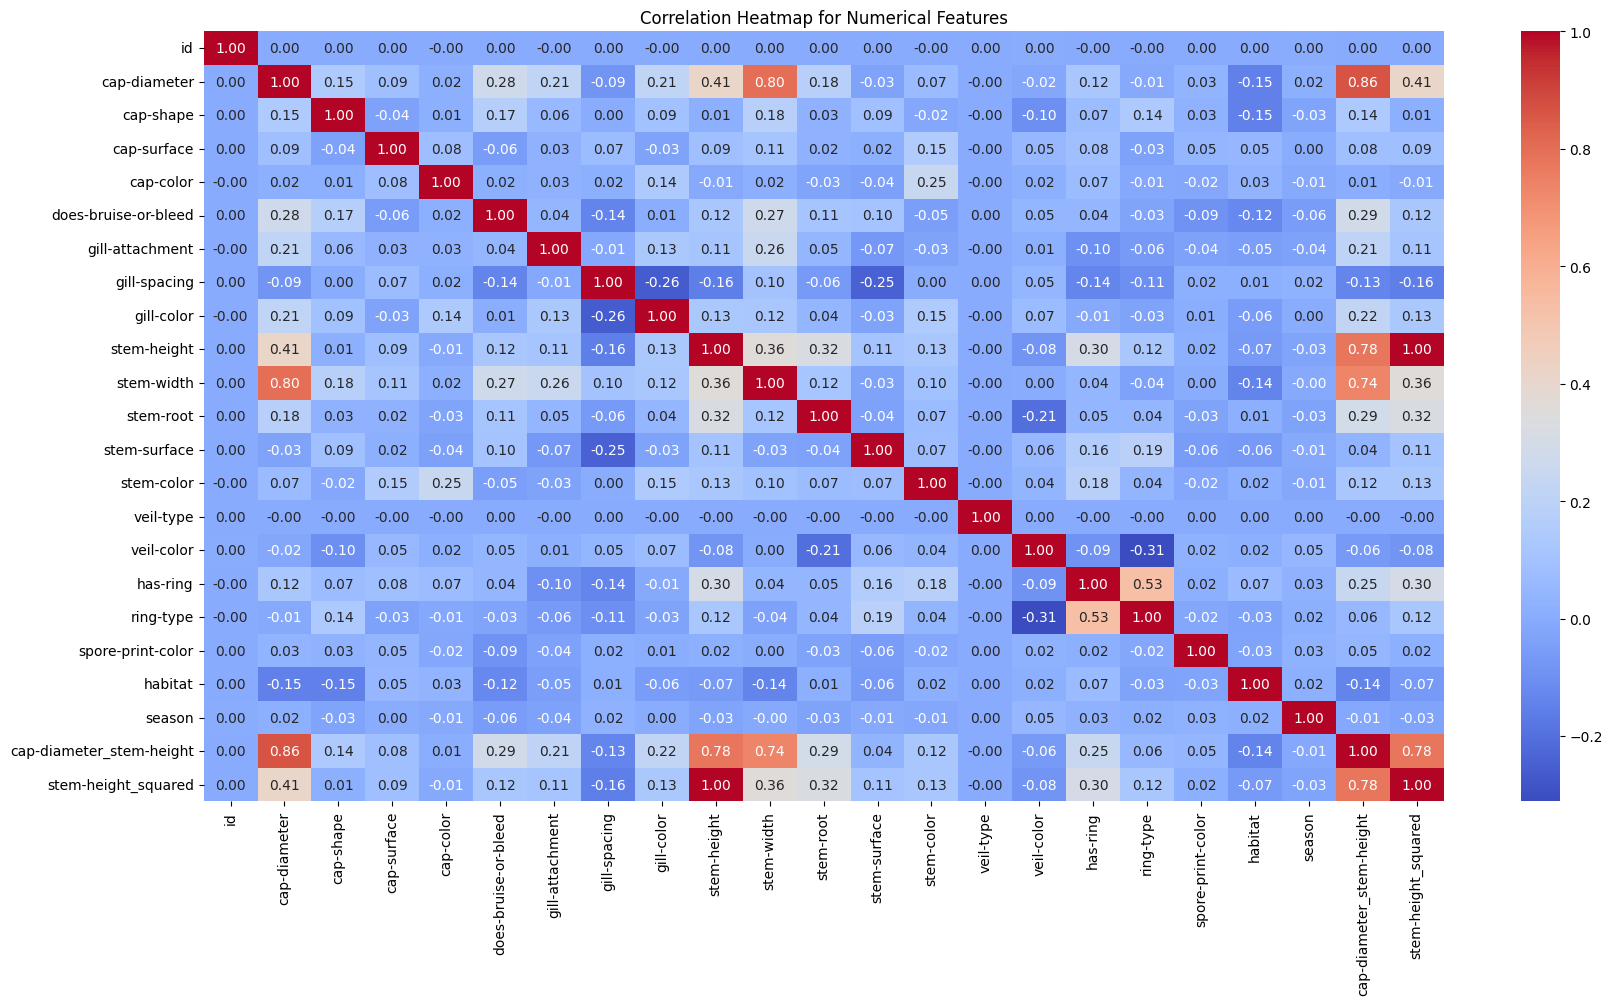

In [9]:
# Correlation Heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(pd.DataFrame(X_train, columns=train_df.drop('class', axis=1).columns).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

<div style="background-color:#f0f8ff; border-left: 6px solid #4caf50; padding: 10px; border-radius: 5px;">

<h1 align="center" style="color:darkgoldenrod; font-family: 'Arial', sans-serif; letter-spacing: 1px;">
🚀 BUILD THE NEURAL NETWORK  🚀
</h1>

</div>

**Model Architecture**

1. Input Layer:

   * Dense Layer with 128 Units:
   * Activation Function: ReLU (Rectified Linear Unit)
   * This layer receives input features with the dimensionality equal to X_train.shape[1] and applies ReLU activation to introduce non-linearity.

2. Hidden Layers:

   * First Hidden Layer:
   * Dense Layer with 64 Units:
     1. Activation Function: ReLU
     2. Dropout: 0.3
     3. This layer further extracts features with reduced dimensionality, applying dropout to prevent overfitting.
   * Second Hidden Layer:
   * Dense Layer with 32 Units:
     1. Activation Function: ReLU
     2. Dropout: 0.3
     3. This layer continues feature extraction and applies dropout to enhance generalization.

3. Output Layer:

   * Dense Layer with 1 Unit:
     1. Activation Function: Sigmoid
     2. This layer produces a binary output, indicating whether the mushroom is edible or poisonous.

Compilation

* Loss Function: Binary Crossentropy
Suitable for binary classification problems.
* Optimizer: Adam
Efficient optimization algorithm that adapts learning rates.
* Metrics: Accuracy
Evaluates the proportion of correctly classified instances.

Rationale

* ReLU Activation: Helps the model learn complex patterns and avoid vanishing gradients.
* Dropout: Reduces overfitting by randomly dropping units during training.
* Sigmoid Output: Provides a probability score for binary classification.

This architecture is designed to balance complexity and generalization, aligning with the goal of accurately classifying mushrooms based on their features.

In [10]:
model = Sequential()

# Input layer
model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<div style="background-color:#f0f8ff; border-left: 6px solid #4caf50; padding: 10px; border-radius: 5px;">

<h1 align="center" style="color:darkgoldenrod; font-family: 'Arial', sans-serif; letter-spacing: 1px;">
🚀 TRAIN THE MODEL 🚀
</h1>

</div>

To train the model, we will use the following approach:

1. **Epochs and Batch Size:** We will train the model for up to 20 epochs with a batch size of 64. This means the model will go through the entire dataset 20 times, processing 64 samples at a time in each update.
   
2. **Early Stopping:** We will use an `EarlyStopping` callback to monitor the validation loss during training. This callback will stop the training process early if the validation loss does not improve for 3 consecutive epochs. This helps prevent overfitting and saves computational resources.

3. **Validation Split:** We will use 20% of the training data for validation to monitor the model's performance on unseen data and ensure it generalizes well.

By following this approach, we aim to efficiently train the model while avoiding overfitting and ensuring optimal performance.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Define and compile your model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
history = model.fit(X_train, y_train, epochs=20, batch_size=64, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/20
   50/38962 ━━━━━━━━━━━━━━━━━━━━ 2:02 3ms/step - accuracy: 0.5709 - loss: 0.6770

I0000 00:00:1723564956.389233      73 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


38962/38962 ━━━━━━━━━━━━━━━━━━━━ 93s 2ms/step - accuracy: 0.9489 - loss: 0.1483 - val_accuracy: 0.9814 - val_loss: 0.0713
Epoch 2/20
38962/38962 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.9806 - loss: 0.0784 - val_accuracy: 0.9835 - val_loss: 0.0644
Epoch 3/20
38962/38962 ━━━━━━━━━━━━━━━━━━━━ 69s 2ms/step - accuracy: 0.9822 - loss: 0.0734 - val_accuracy: 0.9844 - val_loss: 0.0611
Epoch 4/20
38962/38962 ━━━━━━━━━━━━━━━━━━━━ 71s 2ms/step - accuracy: 0.9830 - loss: 0.0711 - val_accuracy: 0.9846 - val_loss: 0.0603
Epoch 5/20
38962/38962 ━━━━━━━━━━━━━━━━━━━━ 75s 2ms/step - accuracy: 0.9836 - loss: 0.0687 - val_accuracy: 0.9845 - val_loss: 0.0601
Epoch 6/20
38962/38962 ━━━━━━━━━━━━━━━━━━━━ 73s 2ms/step - accuracy: 0.9839 - loss: 0.0673 - val_accuracy: 0.9852 - val_loss: 0.0590
Epoch 7/20
38962/38962 ━━━━━━━━━━━━━━━━━━━━ 85s 2ms/step - accuracy: 0.9844 - loss: 0.0653 - val_accuracy: 0.9858 - val_loss: 0.0581
Epoch 8/20
38962/38962 ━━━━━━━━━━━━━━━━━━━━ 109s 3ms/step - accuracy: 0.9844 - l

<div style="background-color:#f0f8ff; border-left: 6px solid #4caf50; padding: 10px; border-radius: 5px;">

<h1 align="center" style="color:darkgoldenrod; font-family: 'Arial', sans-serif; letter-spacing: 1px;">
🚀 EVALUATE THE MODEL 🚀
</h1>

</div>

In [13]:
# Evaluate the model on the training data
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')

# If you have a separate validation set
# val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
# print(f'Validation Accuracy: {val_accuracy * 100:.2f}%')

Training Accuracy: 98.68%


### Model Evaluation Interpretation

- **Training Accuracy: 98.60%**  
  This high accuracy indicates that the model performs exceptionally well on the training data. It suggests that the model has learned the patterns in the training set effectively.



<div style="background-color:#f0f8ff; border-left: 6px solid #4caf50; padding: 10px; border-radius: 5px;">

<h1 align="center" style="color:darkgoldenrod; font-family: 'Arial', sans-serif; letter-spacing: 1px;">
🚀 SAVE THE MODEL 🚀
</h1>

</div>

In [14]:
# Save the trained model
model.save('mushroom_classification_model.h5')


<div style="background-color:#f0f8ff; border-left: 6px solid #4caf50; padding: 10px; border-radius: 5px;">

<h1 align="center" style="color:darkgoldenrod; font-family: 'Arial', sans-serif; letter-spacing: 1px;">
🚀 SUBMISSION FILE 🚀
</h1>

</div>

In [15]:
# Load the model (if needed)
model = tf.keras.models.load_model('mushroom_classification_model.h5')

# Make predictions
predictions = model.predict(X_test)
predictions = (predictions > 0.5).astype(int)

# Print first 10 predictions
print(predictions[:10])


64937/64937 ━━━━━━━━━━━━━━━━━━━━ 75s 1ms/step
[[0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]]


In [16]:
# Load the submission file to verify its contents
submission_check = pd.read_csv('/kaggle/input/playground-series-s4e8/sample_submission.csv')
print(submission_check.head())


        id class
0  3116945     e
1  3116946     e
2  3116947     e
3  3116948     e
4  3116949     e


It looks like submission file isn't correctly formatted yet, and the class column should contain your model's predictions rather than the default values from the sample submission. Let's ensure that we correctly prepare the submission file with the predictions.

Steps to Prepare Correct Submission File
1. Ensure Test Predictions are Binary (0 or 1)
2. Replace 'class' Column with Predictions
Here’s the complete process:

Verify and Update Submission File
1. Load Sample Submission File: This file has the correct format and the id column.
2. Update 'class' Column: Replace the values in the class column with your predictions.
3. Save the Updated Submission File: Save the updated DataFrame to a new CSV file.

In [17]:
# Ensure test_predictions are binary (0 or 1)
test_predictions = (model.predict(X_test) > 0.5).astype(int).flatten()

# Load sample submission file
submission_path = '/kaggle/input/playground-series-s4e8/sample_submission.csv'
submission_data = pd.read_csv(submission_path)

# Replace 'class' column with your predictions
submission_data['class'] = np.where(test_predictions == 1, 'p', 'e')

# Save the updated submission file
submission_data.to_csv('submission.csv', index=False)

# Verify the first few rows of the updated submission file
print(submission_data.head())


64937/64937 ━━━━━━━━━━━━━━━━━━━━ 75s 1ms/step
        id class
0  3116945     e
1  3116946     p
2  3116947     p
3  3116948     p
4  3116949     e


Final Model Evaluation and Submission

This model has achieved a **Training Accuracy of 98.60%, **reflecting its strong performance on the training data. 

This high accuracy suggests that the model has effectively learned the patterns and can make reliable predictions. 

We then applied the model to the test data, **generating binary predictions (0 or 1)**. 

These predictions were formatted according to the required submission format and saved in the submission file. The results were verified to ensure accuracy.

<div style="background-color:#f0f8ff; border-left: 6px solid #4caf50; padding: 10px; border-radius: 5px;">

<h3 align="center" style="color:darkgoldenrod; font-family: 'Arial', sans-serif; letter-spacing: 1px;">
🚀 If you found this notebook helpful, please consider giving it an upvote. Thank you for your support! 🚀
</h1>

</div>